# Package

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

-Classification dataset information

-The raw data contains 7043 rows (customers) and 21 columns (features).

https://www.kaggle.com/blastchar/telco-customer-churn

-Objective: Predict behavior to retain customers.

-Churn: Customers who left within the last month

-Phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies: Services that each customer has signed up for

-Contract, payment method, paperless billing, monthly charges, and total charges: Customer account information

-Gender, age range, and if they have partners and dependents: Demographic

# Read Data

In [33]:
df_churn = pd.read_csv('Telco_Customer_Churn.csv')
df_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Randomly assign missing value

In [34]:
mask = np.random.choice([True, False], size = df_churn.shape, p=[.05,.95])

df_churn = df_churn.mask(mask)

df_churn.info()
df_churn.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6691 non-null object
gender              6677 non-null object
SeniorCitizen       6694 non-null float64
Partner             6687 non-null object
Dependents          6687 non-null object
tenure              6701 non-null float64
PhoneService        6684 non-null object
MultipleLines       6687 non-null object
InternetService     6698 non-null object
OnlineSecurity      6721 non-null object
OnlineBackup        6702 non-null object
DeviceProtection    6685 non-null object
TechSupport         6704 non-null object
StreamingTV         6708 non-null object
StreamingMovies     6693 non-null object
Contract            6641 non-null object
PaperlessBilling    6689 non-null object
PaymentMethod       6669 non-null object
MonthlyCharges      6735 non-null float64
TotalCharges        6669 non-null object
Churn               6677 non-null object
dtypes: float64(3), object(18

7404

In [35]:
df_churn.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,NaN
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,NaN,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,NaN,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,NaN,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,NaN,0.0,No,Yes,22.0,Yes,Yes,NaN,No,...,NaN,No,Yes,No,Month-to-month,Yes,NaN,89.10,1949.4,NaN
7,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,NaN,No
8,7892-POOKP,Female,NaN,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,NaN,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0.0,No,Yes,62.0,NaN,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Preprocessing

### Replace spaces with N/A

In [36]:
df_churn['TotalCharges'] = df_churn["TotalCharges"].replace(" ",np.nan)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6691 non-null object
gender              6677 non-null object
SeniorCitizen       6694 non-null float64
Partner             6687 non-null object
Dependents          6687 non-null object
tenure              6701 non-null float64
PhoneService        6684 non-null object
MultipleLines       6687 non-null object
InternetService     6698 non-null object
OnlineSecurity      6721 non-null object
OnlineBackup        6702 non-null object
DeviceProtection    6685 non-null object
TechSupport         6704 non-null object
StreamingTV         6708 non-null object
StreamingMovies     6693 non-null object
Contract            6641 non-null object
PaperlessBilling    6689 non-null object
PaymentMethod       6669 non-null object
MonthlyCharges      6735 non-null float64
TotalCharges        6661 non-null object
Churn               6677 non-null object
dtypes: float64(3), object(18

### Correct data type

In [37]:
df_churn["TotalCharges"] = df_churn["TotalCharges"].astype(float)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6691 non-null object
gender              6677 non-null object
SeniorCitizen       6694 non-null float64
Partner             6687 non-null object
Dependents          6687 non-null object
tenure              6701 non-null float64
PhoneService        6684 non-null object
MultipleLines       6687 non-null object
InternetService     6698 non-null object
OnlineSecurity      6721 non-null object
OnlineBackup        6702 non-null object
DeviceProtection    6685 non-null object
TechSupport         6704 non-null object
StreamingTV         6708 non-null object
StreamingMovies     6693 non-null object
Contract            6641 non-null object
PaperlessBilling    6689 non-null object
PaymentMethod       6669 non-null object
MonthlyCharges      6735 non-null float64
TotalCharges        6661 non-null float64
Churn               6677 non-null object
dtypes: float64(4), object(1

### Impute value for missing data

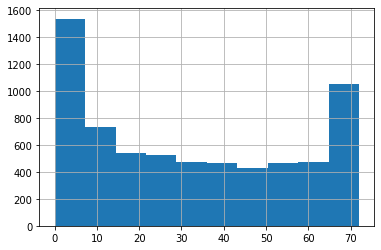

In [38]:
df_churn['tenure'].hist()

Based on data distribution, used mean to impute missing value.

In [39]:
imp_tenure = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_churn['tenure'] = imp_tenure.fit_transform(df_churn[["tenure"]]).ravel()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


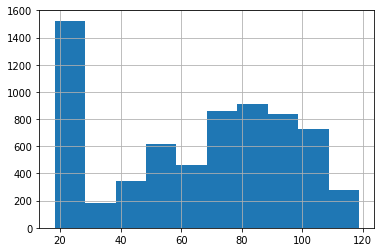

In [40]:
df_churn['MonthlyCharges'].hist()

In [41]:
imp_MonthlyCharges = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_churn['MonthlyCharges'] = imp_MonthlyCharges.fit_transform(df_churn[["MonthlyCharges"]]).ravel()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


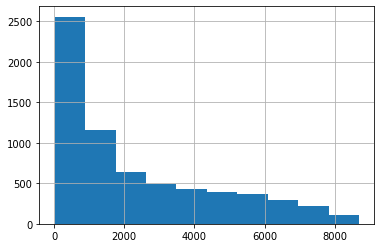

In [42]:
df_churn['TotalCharges'].hist()

Based on data distribution, used median to impute missing value.

In [43]:
imp_TotalCharges = Imputer(missing_values='NaN', strategy='median', axis=0)
df_churn['TotalCharges'] = imp_TotalCharges.fit_transform(df_churn[["TotalCharges"]]).ravel()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


For boolean and categorical data, filled missing value with previous data.

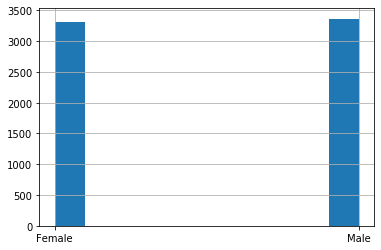

In [44]:
df_churn['gender'].hist()
df_churn['gender'] = df_churn['gender'].fillna(method='ffill')

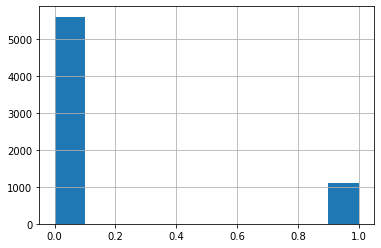

In [45]:
df_churn['SeniorCitizen'].hist()
df_churn['SeniorCitizen'] = df_churn['SeniorCitizen'].fillna(method='ffill')

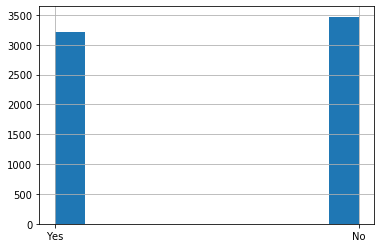

In [46]:
df_churn['Partner'].hist()
df_churn['Partner'] = df_churn['Partner'].fillna(method='ffill')

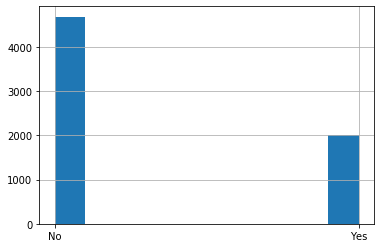

In [47]:
df_churn['Dependents'].hist()
df_churn['Dependents'] = df_churn['Dependents'].fillna(method='ffill')

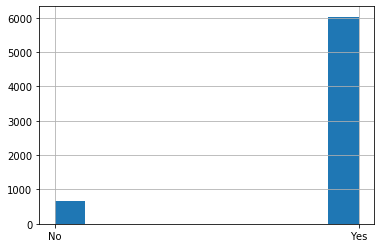

In [48]:
df_churn['PhoneService'].hist()
df_churn['PhoneService'] = df_churn['PhoneService'].fillna(method='ffill')

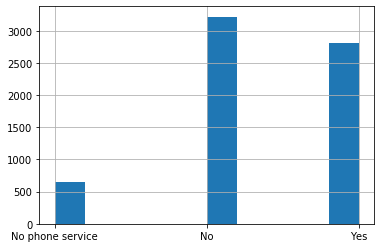

In [49]:
df_churn['MultipleLines'].hist()
df_churn['MultipleLines'] = df_churn['MultipleLines'].fillna(method='ffill')

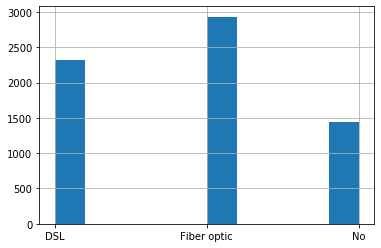

In [50]:
df_churn['InternetService'].hist()
df_churn['InternetService'] = df_churn['InternetService'].fillna(method='ffill')

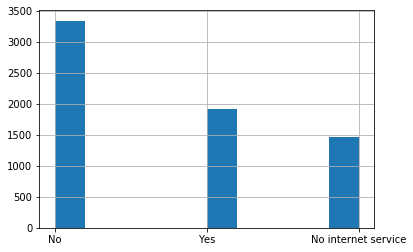

In [52]:
df_churn['OnlineSecurity'].hist()
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].fillna(method='ffill')

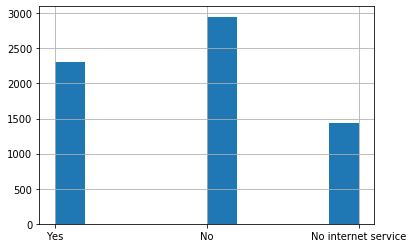

In [53]:
df_churn['OnlineBackup'].hist()
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].fillna(method='ffill')

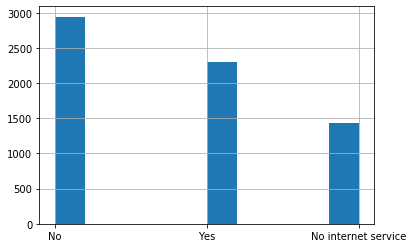

In [54]:
df_churn['DeviceProtection'].hist()
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].fillna(method='ffill')

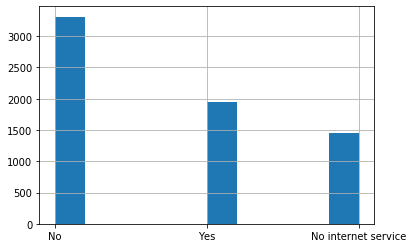

In [55]:
df_churn['TechSupport'].hist()
df_churn['TechSupport'] = df_churn['TechSupport'].fillna(method='ffill')

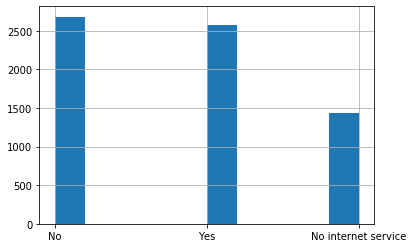

In [56]:
df_churn['StreamingTV'].hist()
df_churn['StreamingTV'] = df_churn['StreamingTV'].fillna(method='ffill')

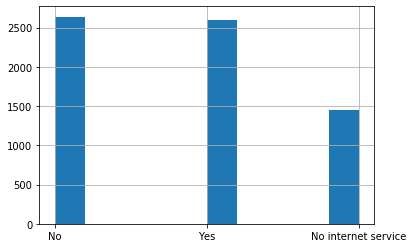

In [57]:
df_churn['StreamingMovies'].hist()
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].fillna(method='ffill')

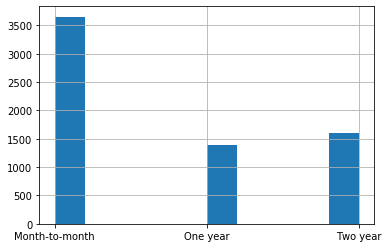

In [58]:
df_churn['Contract'].hist()
df_churn['Contract'] = df_churn['Contract'].fillna(method='ffill')

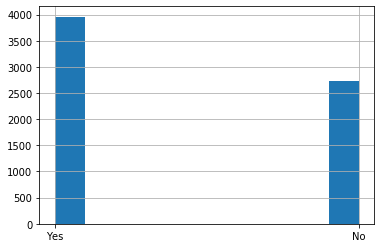

In [59]:
df_churn['PaperlessBilling'].hist()
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].fillna(method='ffill')

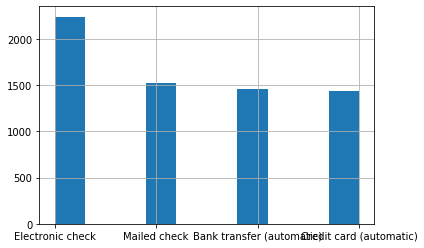

In [60]:
df_churn['PaymentMethod'].hist()
df_churn['PaymentMethod'] = df_churn['PaymentMethod'].fillna(method='ffill')

In [62]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6691 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               6677 non-null object
dtypes: float64(4), object(1

In [64]:
df_churn["SeniorCitizen"] = df_churn["SeniorCitizen"].astype(object)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6691 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               6677 non-null object
dtypes: float64(3), object(18

Drop other missing value that is in column customer and churn, because one is our target value, we don't want to mislead the model, and customerID doesn't affect our model, and will dorop the column later.

In [65]:
df_churn = df_churn.dropna()
df_churn.info()
df_churn.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6342 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6342 non-null object
gender              6342 non-null object
SeniorCitizen       6342 non-null object
Partner             6342 non-null object
Dependents          6342 non-null object
tenure              6342 non-null float64
PhoneService        6342 non-null object
MultipleLines       6342 non-null object
InternetService     6342 non-null object
OnlineSecurity      6342 non-null object
OnlineBackup        6342 non-null object
DeviceProtection    6342 non-null object
TechSupport         6342 non-null object
StreamingTV         6342 non-null object
StreamingMovies     6342 non-null object
Contract            6342 non-null object
PaperlessBilling    6342 non-null object
PaymentMethod       6342 non-null object
MonthlyCharges      6342 non-null float64
TotalCharges        6342 non-null float64
Churn               6342 non-null object
dtypes: float64(3), object(18

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9305-CDSKC,Female,0,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,1410.25,No


In [66]:
df_churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,6342.000000,6342.000000,6342.000000
mean,32.119192,65.014907,2233.551474
std,23.975085,29.299392,2206.270554
min,0.000000,18.250000,18.800000
25%,9.000000,40.787500,435.637500
50%,31.000000,69.650000,1410.250000
75%,54.000000,89.450000,3590.987500
max,72.000000,118.750000,8684.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118fd9a10>,
      dtype=object)

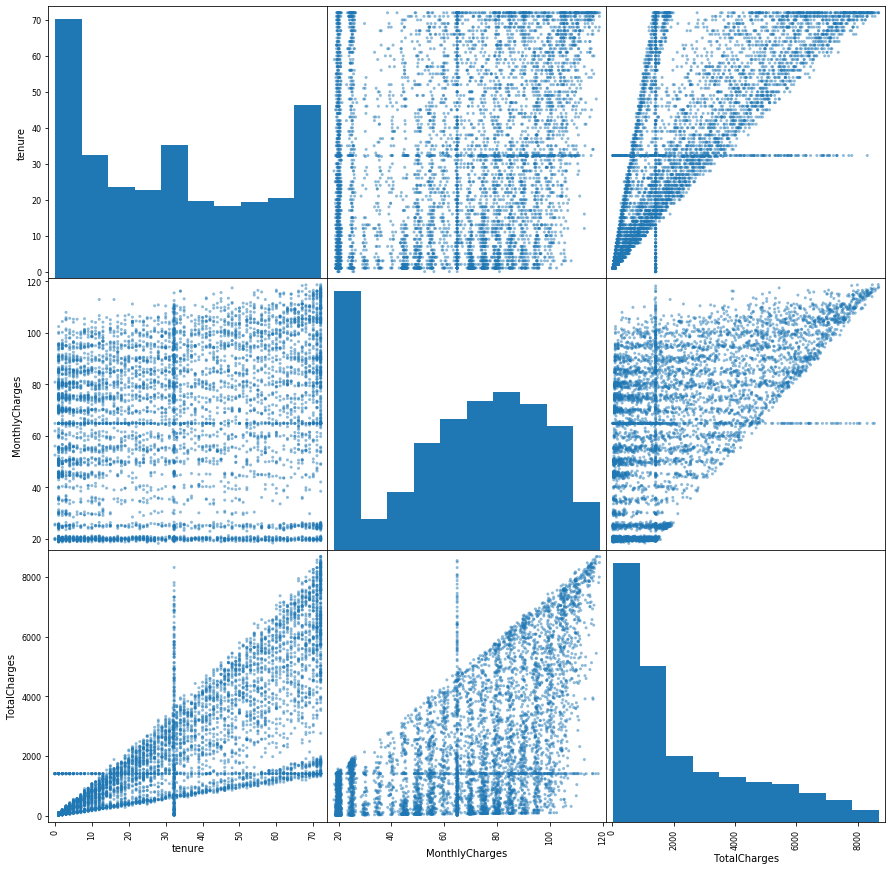

In [67]:
%matplotlib inline
pd.plotting.scatter_matrix(df_churn, figsize = (15, 15))

Transform data to number (Yes: 1, No: 0) or using dummy variable.

In [68]:
df_churn[['Churn', 'customerID']].groupby('Churn')['customerID'].count()

Churn
No     4637
Yes    1705
Name: customerID, dtype: int64

In [69]:
df_churn['Churn'] = df_churn['Churn'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['Churn', 'customerID']].groupby('Churn')['customerID'].count()

Churn
0    4637
1    1705
Name: customerID, dtype: int64

In [70]:
df_churn[['SeniorCitizen', 'customerID']].groupby('SeniorCitizen')['customerID'].count()

SeniorCitizen
0.0    5294
1.0    1048
Name: customerID, dtype: int64

In [71]:
df_churn[['gender', 'customerID']].groupby('gender')['customerID'].count()

gender
Female    3154
Male      3188
Name: customerID, dtype: int64

In [72]:
df_churn['gender'] = df_churn['gender'].map( {'Male': 1, 'Female': 0} ).astype(int)
df_churn[['gender', 'customerID']].groupby('gender')['customerID'].count()

gender
0    3154
1    3188
Name: customerID, dtype: int64

In [73]:
df_churn[['Partner', 'customerID']].groupby('Partner')['customerID'].count()

Partner
No     3293
Yes    3049
Name: customerID, dtype: int64

In [74]:
df_churn['Partner'] = df_churn['Partner'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['Partner', 'customerID']].groupby('Partner')['customerID'].count()

Partner
0    3293
1    3049
Name: customerID, dtype: int64

In [75]:
df_churn[['Dependents', 'customerID']].groupby('Dependents')['customerID'].count()

Dependents
No     4448
Yes    1894
Name: customerID, dtype: int64

In [76]:
df_churn['Dependents'] = df_churn['Dependents'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['Dependents', 'customerID']].groupby('Dependents')['customerID'].count()

Dependents
0    4448
1    1894
Name: customerID, dtype: int64

In [77]:
df_churn[['PhoneService', 'customerID']].groupby('PhoneService')['customerID'].count()

PhoneService
No      620
Yes    5722
Name: customerID, dtype: int64

In [78]:
df_churn['PhoneService'] = df_churn['PhoneService'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['PhoneService', 'customerID']].groupby('PhoneService')['customerID'].count()

PhoneService
0     620
1    5722
Name: customerID, dtype: int64

In [79]:
df_churn[['MultipleLines', 'customerID']].groupby('MultipleLines')['customerID'].count()

MultipleLines
No                  3073
No phone service     601
Yes                 2668
Name: customerID, dtype: int64

In [80]:
df_churn['MultipleLines'] = df_churn['MultipleLines'].map( {'Yes': 1, 'No': 0, 'No phone service': 0} ).astype(int)
df_churn[['MultipleLines', 'customerID']].groupby('MultipleLines')['customerID'].count()

MultipleLines
0    3674
1    2668
Name: customerID, dtype: int64

In [81]:
df_churn[['InternetService', 'customerID']].groupby('InternetService')['customerID'].count()

InternetService
DSL            2189
Fiber optic    2794
No             1359
Name: customerID, dtype: int64

In [82]:
InternetService = pd.get_dummies(df_churn['InternetService'],columns='InternetService',prefix='InternetService')
print(InternetService)
df_churn = pd.concat([df_churn, InternetService], axis=1)
df_churn.drop(['InternetService'],axis=1,inplace= True)
df_churn.shape

      InternetService_DSL  InternetService_Fiber optic  InternetService_No
0                       1                            0                   0
2                       1                            0                   0
3                       1                            0                   0
5                       0                            1                   0
7                       1                            0                   0
...                   ...                          ...                 ...
7038                    1                            0                   0
7039                    0                            1                   0
7040                    1                            0                   0
7041                    0                            1                   0
7042                    0                            1                   0

[6342 rows x 3 columns]


(6342, 23)

In [83]:
df_churn[['OnlineSecurity', 'customerID']].groupby('OnlineSecurity')['customerID'].count()

OnlineSecurity
No                     3165
No internet service    1367
Yes                    1810
Name: customerID, dtype: int64

In [84]:
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['OnlineSecurity', 'customerID']].groupby('OnlineSecurity')['customerID'].count()

OnlineSecurity
0    4532
1    1810
Name: customerID, dtype: int64

In [85]:
df_churn[['OnlineBackup', 'customerID']].groupby('OnlineBackup')['customerID'].count()

OnlineBackup
No                     2820
No internet service    1339
Yes                    2183
Name: customerID, dtype: int64

In [86]:
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['OnlineBackup', 'customerID']].groupby('OnlineBackup')['customerID'].count()

OnlineBackup
0    4159
1    2183
Name: customerID, dtype: int64

In [87]:
df_churn[['DeviceProtection', 'customerID']].groupby('DeviceProtection')['customerID'].count()

DeviceProtection
No                     2848
No internet service    1346
Yes                    2148
Name: customerID, dtype: int64

In [88]:
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['DeviceProtection', 'customerID']].groupby('DeviceProtection')['customerID'].count()

DeviceProtection
0    4194
1    2148
Name: customerID, dtype: int64

In [89]:
df_churn[['TechSupport', 'customerID']].groupby('TechSupport')['customerID'].count()

TechSupport
No                     3122
No internet service    1359
Yes                    1861
Name: customerID, dtype: int64

In [90]:
df_churn['TechSupport'] = df_churn['TechSupport'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['TechSupport', 'customerID']].groupby('TechSupport')['customerID'].count()

TechSupport
0    4481
1    1861
Name: customerID, dtype: int64

In [91]:
df_churn[['StreamingTV', 'customerID']].groupby('StreamingTV')['customerID'].count()

StreamingTV
No                     2563
No internet service    1347
Yes                    2432
Name: customerID, dtype: int64

In [92]:
df_churn['StreamingTV'] = df_churn['StreamingTV'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['StreamingTV', 'customerID']].groupby('StreamingTV')['customerID'].count()

StreamingTV
0    3910
1    2432
Name: customerID, dtype: int64

In [93]:
df_churn[['StreamingMovies', 'customerID']].groupby('StreamingMovies')['customerID'].count()

StreamingMovies
No                     2504
No internet service    1366
Yes                    2472
Name: customerID, dtype: int64

In [94]:
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['StreamingMovies', 'customerID']].groupby('StreamingMovies')['customerID'].count()

StreamingMovies
0    3870
1    2472
Name: customerID, dtype: int64

In [95]:
df_churn[['Contract', 'customerID']].groupby('Contract')['customerID'].count()

Contract
Month-to-month    3513
One year          1334
Two year          1495
Name: customerID, dtype: int64

In [96]:
Contract = pd.get_dummies(df_churn['Contract'],columns='Contract',prefix='Contract')
print(Contract)
df_churn = pd.concat([df_churn, Contract], axis=1)
df_churn.drop(['Contract'],axis=1,inplace= True)
df_churn.shape

      Contract_Month-to-month  Contract_One year  Contract_Two year
0                           1                  0                  0
2                           1                  0                  0
3                           0                  1                  0
5                           1                  0                  0
7                           1                  0                  0
...                       ...                ...                ...
7038                        0                  1                  0
7039                        0                  1                  0
7040                        1                  0                  0
7041                        1                  0                  0
7042                        0                  0                  1

[6342 rows x 3 columns]


(6342, 25)

In [97]:
df_churn[['PaperlessBilling', 'customerID']].groupby('PaperlessBilling')['customerID'].count()

PaperlessBilling
No     2561
Yes    3781
Name: customerID, dtype: int64

In [98]:
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['PaperlessBilling', 'customerID']].groupby('PaperlessBilling')['customerID'].count()

PaperlessBilling
0    2561
1    3781
Name: customerID, dtype: int64

In [99]:
df_churn[['PaymentMethod', 'customerID']].groupby('PaymentMethod')['customerID'].count()

PaymentMethod
Bank transfer (automatic)    1373
Credit card (automatic)      1359
Electronic check             2146
Mailed check                 1464
Name: customerID, dtype: int64

In [100]:
PaymentMethod = pd.get_dummies(df_churn['PaymentMethod'],columns='PaymentMethod',prefix='PaymentMethod')
print(PaymentMethod)
df_churn = pd.concat([df_churn, PaymentMethod], axis=1)
df_churn.drop(['PaymentMethod'],axis=1,inplace= True)
df_churn.shape

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
2                                           0   
3                                           1   
5                                           0   
7                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040                                        0   
7041                                        0   
7042                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
2                                         0                               0   
3                                         0                               0   
5                                         0                               1   
7               

(6342, 28)

In [101]:
df_churn[['MonthlyCharges', 'Churn']].groupby('Churn')['MonthlyCharges'].mean()

Churn
0    61.671240
1    74.108505
Name: MonthlyCharges, dtype: float64

In [102]:
df_churn[['TotalCharges', 'Churn']].groupby('Churn')['TotalCharges'].mean()

Churn
0    2491.536457
1    1531.923109
Name: TotalCharges, dtype: float64

In [2]:
df_churn[['tenure', 'Churn']].groupby('Churn')['tenure'].mean()

NameError: name 'df_churn' is not defined

customerID doesn't affect our model, so drop it.

In [104]:
df_churn.drop(['customerID'],axis=1,inplace= True)

In [105]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6342 entries, 0 to 7042
Data columns (total 27 columns):
gender                                     6342 non-null int64
SeniorCitizen                              6342 non-null object
Partner                                    6342 non-null int64
Dependents                                 6342 non-null int64
tenure                                     6342 non-null float64
PhoneService                               6342 non-null int64
MultipleLines                              6342 non-null int64
OnlineSecurity                             6342 non-null int64
OnlineBackup                               6342 non-null int64
DeviceProtection                           6342 non-null int64
TechSupport                                6342 non-null int64
StreamingTV                                6342 non-null int64
StreamingMovies                            6342 non-null int64
PaperlessBilling                           6342 non-null int64
MonthlyC

### Splitting data

In [106]:
y_variable = 'Churn'
X_features = [ i for i in df_churn.columns if(i!=y_variable)]

df_churn_X = df_churn[X_features]
df_churn_y = df_churn[y_variable]

In [107]:
df_churn_X_train_org, df_churn_X_test_org, df_churn_y_train, df_churn_y_test = train_test_split(df_churn_X, df_churn_y,random_state=0)

### Scaling data: using MinMaxScaler()

Because we don't want to change the distribution of the dataset.

In [108]:
minmaxS = MinMaxScaler()
df_churn_X_train = minmaxS.fit_transform(df_churn_X_train_org)
df_churn_X_test = minmaxS.transform(df_churn_X_test_org)

array([[1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [109]:
df_churn.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [110]:
df_churn_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
df_churn_X_train = pd.DataFrame(df_churn_X_train, columns = df_churn_columns)
df_churn_X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,...,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000
mean,0.506939,0.160849,0.488225,0.301304,0.449527,0.900757,0.420942,0.285534,0.346720,0.344407,...,0.343146,0.440496,0.216358,0.552145,0.208789,0.239066,0.210681,0.221405,0.339571,0.228343
std,0.500004,0.367431,0.499914,0.458873,0.334110,0.299020,0.493762,0.451716,0.475976,0.475224,...,0.474810,0.496499,0.411805,0.497326,0.406486,0.426558,0.407835,0.415236,0.473613,0.419809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.430556,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Classification Model

### KNN classification

In [150]:
knn_param_grid = {'n_neighbors': np.arange(1, 51),
              'weights': ['uniform','distance']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
knn_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_grid_search.best_score_))

knn_result = pd.DataFrame(knn_grid_search.cv_results_)
#knn_result.head()

Best parameters: {'n_neighbors': 47, 'weights': 'uniform'}
Best cross-validation score: 0.8238


UsageError: Line magic function `%%time` not found.


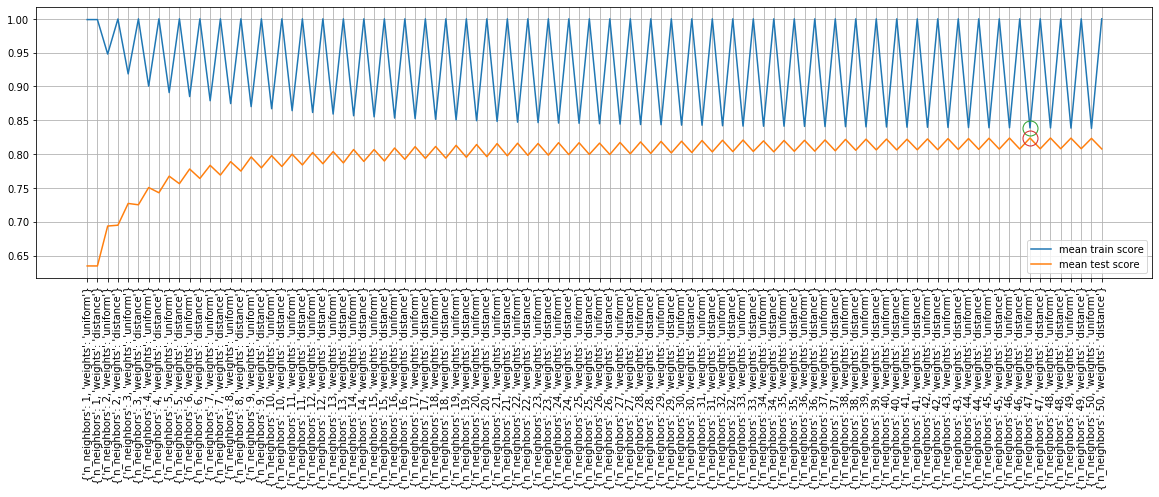

In [112]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(knn_result['params'].shape[0]), knn_result['mean_train_score'], label = 'mean train score')
plt.plot(range(knn_result['params'].shape[0]), knn_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(knn_result['params'].shape[0]), knn_result['params'], rotation = 90)
plt.plot([knn_grid_search.best_index_], knn_result['mean_train_score'][knn_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([knn_grid_search.best_index_], knn_result['mean_test_score'][knn_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [151]:
%%time
knn_pred = knn_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, knn_pred))
print(classification_report(df_churn_y_test, knn_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, knn_pred)))
knn_roc_auc_score = roc_auc_score(df_churn_y_test, knn_pred)

[[1000  137]
 [ 192  257]]
              precision    recall  f1-score   support

           0     0.8389    0.8795    0.8587      1137
           1     0.6523    0.5724    0.6097       449

    accuracy                         0.7926      1586
   macro avg     0.7456    0.7259    0.7342      1586
weighted avg     0.7861    0.7926    0.7882      1586

roc_auc_score: 0.7259
CPU times: user 311 ms, sys: 2.83 ms, total: 313 ms
Wall time: 313 ms


### Logistic Regression

In [116]:
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_grid_search = GridSearchCV(LogisticRegression(random_state = 0, solver = 'lbfgs'), log_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
log_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(log_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(log_grid_search.best_score_))

log_result = pd.DataFrame(log_grid_search.cv_results_)
#log_result.head()

Best parameters: {'C': 100}
Best cross-validation score: 0.8298


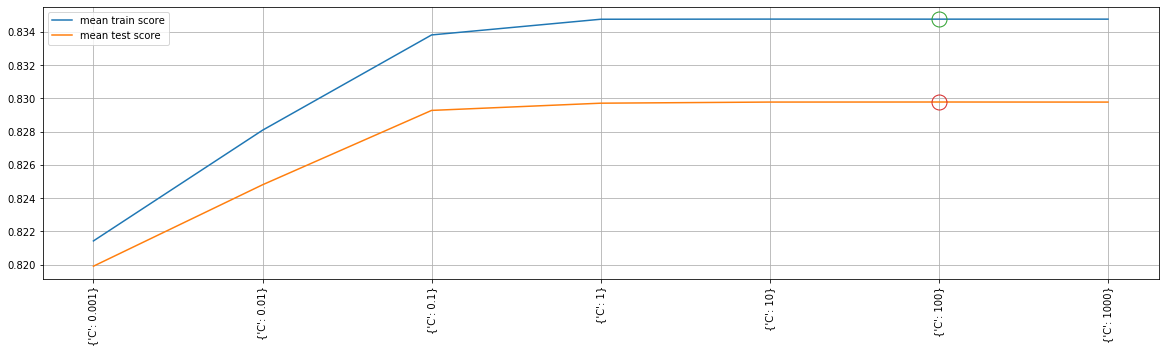

In [117]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(log_result['params'].shape[0]), log_result['mean_train_score'], label = 'mean train score')
plt.plot(range(log_result['params'].shape[0]), log_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(log_result['params'].shape[0]), log_result['params'], rotation = 90)
plt.plot([log_grid_search.best_index_], log_result['mean_train_score'][log_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([log_grid_search.best_index_], log_result['mean_test_score'][log_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [153]:
%%time
log_pred = log_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, log_pred))
print(classification_report(df_churn_y_test, log_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, log_pred)))
log_roc_auc_score = roc_auc_score(df_churn_y_test, log_pred)

[[1021  116]
 [ 203  246]]
              precision    recall  f1-score   support

           0     0.8342    0.8980    0.8649      1137
           1     0.6796    0.5479    0.6067       449

    accuracy                         0.7989      1586
   macro avg     0.7569    0.7229    0.7358      1586
weighted avg     0.7904    0.7989    0.7918      1586

roc_auc_score: 0.7229
CPU times: user 23.3 ms, sys: 3.17 ms, total: 26.5 ms
Wall time: 17.9 ms


### Linear Support Vector Machine 

In [121]:
lsvc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lsvc_grid_search = GridSearchCV(LinearSVC(random_state = 0, max_iter = 10000), lsvc_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
lsvc_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(lsvc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(lsvc_grid_search.best_score_))

lsvc_result = pd.DataFrame(lsvc_grid_search.cv_results_)
#lsvc_result.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Best parameters: {'C': 100}
Best cross-validation score: 0.8287


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


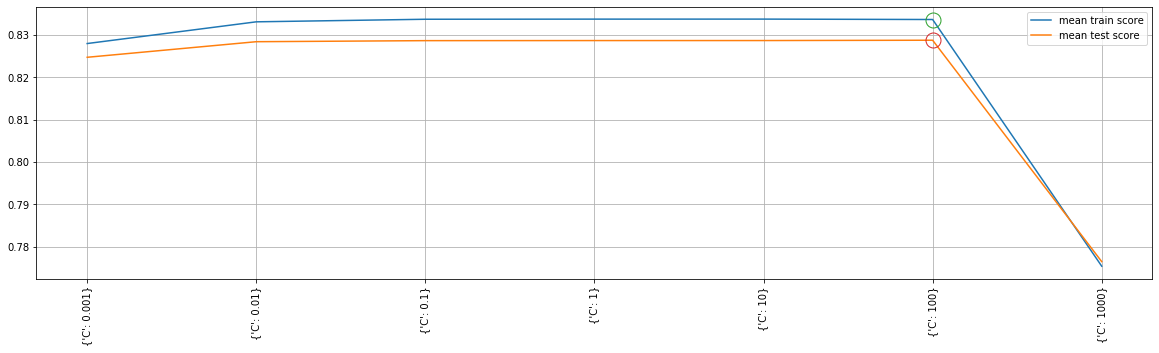

In [122]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(lsvc_result['params'].shape[0]), lsvc_result['mean_train_score'], label = 'mean train score')
plt.plot(range(lsvc_result['params'].shape[0]), lsvc_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(lsvc_result['params'].shape[0]), lsvc_result['params'], rotation = 90)
plt.plot([lsvc_grid_search.best_index_], lsvc_result['mean_train_score'][lsvc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([lsvc_grid_search.best_index_], lsvc_result['mean_test_score'][lsvc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [154]:
%%time
lsvc_pred = lsvc_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, lsvc_pred))
print(classification_report(df_churn_y_test, lsvc_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, lsvc_pred)))
lsvc_roc_auc_score = roc_auc_score(df_churn_y_test, lsvc_pred)

[[1023  114]
 [ 211  238]]
              precision    recall  f1-score   support

           0     0.8290    0.8997    0.8629      1137
           1     0.6761    0.5301    0.5943       449

    accuracy                         0.7951      1586
   macro avg     0.7526    0.7149    0.7286      1586
weighted avg     0.7857    0.7951    0.7869      1586

roc_auc_score: 0.7149
CPU times: user 14.4 ms, sys: 1.45 ms, total: 15.8 ms
Wall time: 30.4 ms


### Kerenilzed Support Vector Machine (rbf, poly, and linear)

In [126]:
svc_param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100], 
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                  {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                  {'kernel': ['poly'],
               'degree': np.arange(1, 11)}
             ]
svc_grid_search = GridSearchCV(SVC(random_state = 0), svc_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
svc_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(svc_grid_search.best_score_))


svc_result = pd.DataFrame(svc_grid_search.cv_results_)
#svc_result.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.8237


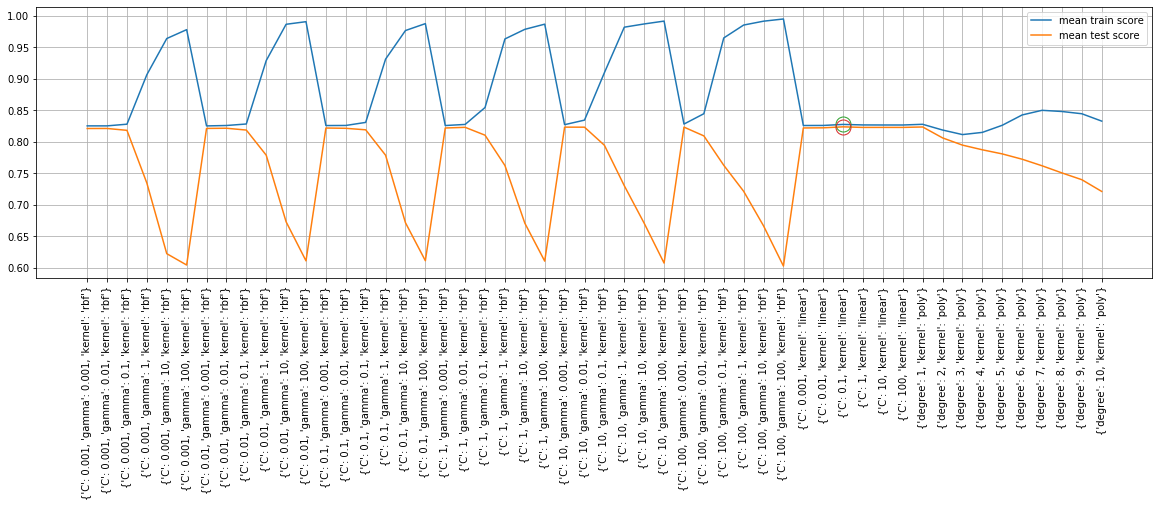

In [127]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(svc_result['params'].shape[0]), svc_result['mean_train_score'], label = 'mean train score')
plt.plot(range(svc_result['params'].shape[0]), svc_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(svc_result['params'].shape[0]), svc_result['params'], rotation = 90)
plt.plot([svc_grid_search.best_index_], svc_result['mean_train_score'][svc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svc_grid_search.best_index_], svc_result['mean_test_score'][svc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [155]:
%%time
svc_pred = svc_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, svc_pred))
print(classification_report(df_churn_y_test, svc_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, svc_pred)))
svc_roc_auc_score = roc_auc_score(df_churn_y_test, svc_pred)

[[1020  117]
 [ 205  244]]
              precision    recall  f1-score   support

           0     0.8327    0.8971    0.8637      1137
           1     0.6759    0.5434    0.6025       449

    accuracy                         0.7970      1586
   macro avg     0.7543    0.7203    0.7331      1586
weighted avg     0.7883    0.7970    0.7897      1586

roc_auc_score: 0.7203
CPU times: user 95.8 ms, sys: 2.83 ms, total: 98.6 ms
Wall time: 99.3 ms


### Decision Tree

In [131]:
tree_param_grid = {'max_depth': np.arange(1, 11), 
                   'criterion': ['gini','entropy']
                  }
tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 0), tree_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
tree_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(tree_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(tree_grid_search.best_score_))

tree_result = pd.DataFrame(tree_grid_search.cv_results_)
#tree_result.head()

Best parameters: {'criterion': 'entropy', 'max_depth': 5}
Best cross-validation score: 0.8105


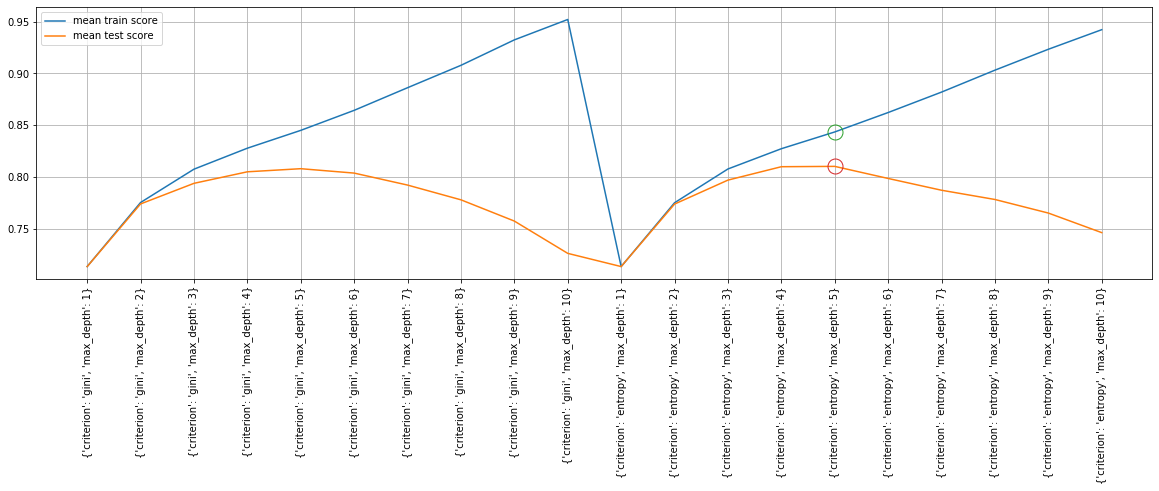

In [132]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(tree_result['params'].shape[0]), tree_result['mean_train_score'], label = 'mean train score')
plt.plot(range(tree_result['params'].shape[0]), tree_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(tree_result['params'].shape[0]), tree_result['params'], rotation = 90)
plt.plot([tree_grid_search.best_index_], tree_result['mean_train_score'][tree_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([tree_grid_search.best_index_], tree_result['mean_test_score'][tree_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [156]:
%%time
tree_pred = tree_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, tree_pred))
print(classification_report(df_churn_y_test, tree_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, tree_pred)))
tree_roc_auc_score = roc_auc_score(df_churn_y_test, tree_pred)

[[1018  119]
 [ 215  234]]
              precision    recall  f1-score   support

           0     0.8256    0.8953    0.8591      1137
           1     0.6629    0.5212    0.5835       449

    accuracy                         0.7894      1586
   macro avg     0.7443    0.7082    0.7213      1586
weighted avg     0.7796    0.7894    0.7811      1586

roc_auc_score: 0.7082
CPU times: user 11.4 ms, sys: 1.79 ms, total: 13.2 ms
Wall time: 12.2 ms


# Model Performances

## Precision recall curves

### KNN classification

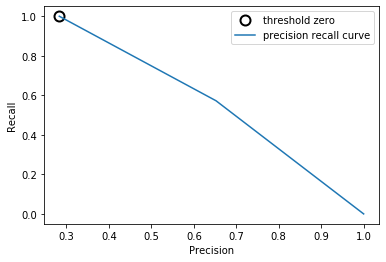

In [136]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, knn_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### Logistic Regression

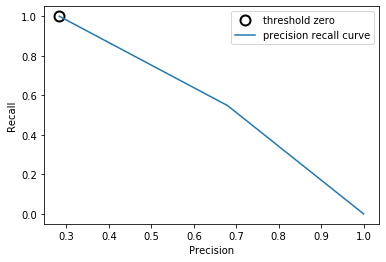

In [119]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, log_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### Linear Support Vector Machine 

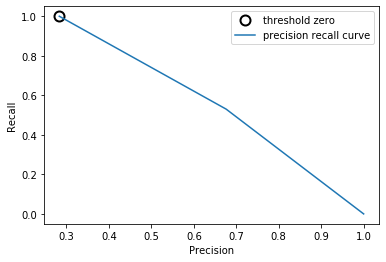

In [124]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, lsvc_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### Kerenilzed Support Vector Machine (rbf, poly, and linear)

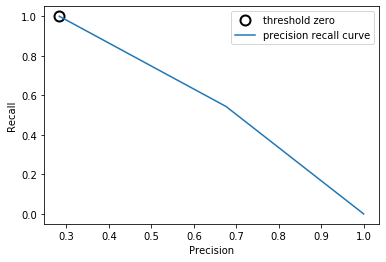

In [129]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, svc_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### Decision Tree

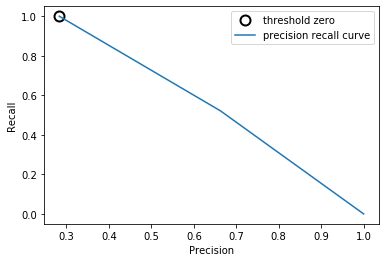

In [134]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, tree_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

## ROC Curves

### KNN classification

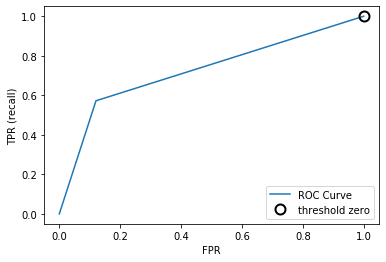

In [115]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, knn_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Logistic Regression

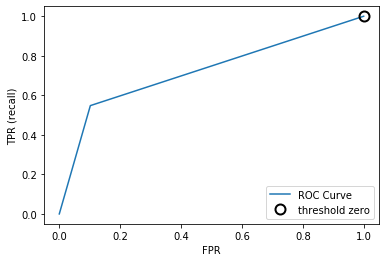

In [120]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, log_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Linear Support Vector Machine 

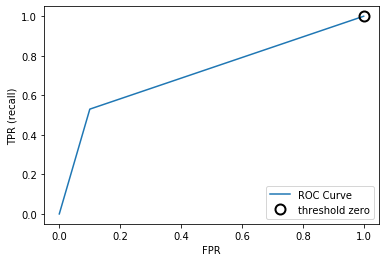

In [125]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, lsvc_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Kerenilzed Support Vector Machine (rbf, poly, and linear)

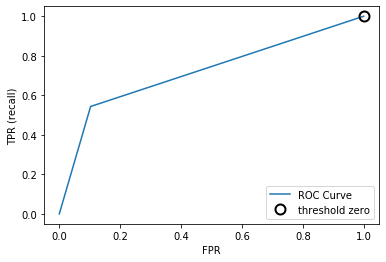

In [130]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, svc_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Decision Tree

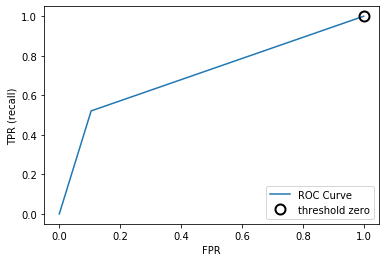

In [135]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, tree_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Model Performance Metrics

In [148]:
model_performance_metrics = pd.DataFrame({"Model": ['KNN classification', 'Logistic Regression', 'Linear Support Vector Machine', 'Kerenilzed Support Vector Machine', 'Decision Tree'],
                                          "Cross-validation Score": [knn_grid_search.best_score_, log_grid_search.best_score_, lsvc_grid_search.best_score_, svc_grid_search.best_score_, tree_grid_search.best_score_],
                                          "Roc_Auc_Score": [knn_roc_auc_score, log_roc_auc_score, lsvc_roc_auc_score, svc_roc_auc_score, tree_roc_auc_score],
                                         })

In [149]:
model_performance_metrics

,Model,Cross-validation Score,Roc_Auc_Score
0,KNN classification,0.823808,0.725945
1,Logistic Regression,0.829780,0.722931
2,Linear Support Vector Machine,0.828675,0.714901
3,Kerenilzed Support Vector Machine,0.823681,0.720264
4,Decision Tree,0.810478,0.708248


# Conclusion

Based on the final roc auc score, performance of all models are similar, and KNN classification has the highest score. But if we consider the run time, logistic regression or decision tree may be the better options.